The goal of this Project was to perform clustering analysis , a form of unsupervised machine learning. At the end of this Project I was able segment each customers on the dataset to 4 different clusters with respect to there features , I made use of K_means and also PCA(For dimension reduction and better visualization of the resulting clusters). This project can be improved on by performing credit scoring ,In which points will be awarded to each customers based on if they meet certain conditions. 

In [1]:
import pandas as pd , seaborn as sns , matplotlib.pyplot as plt , os , numpy as np

In [2]:
data = pd.read_csv('C:\\Users\\user\\Documents\\datasets\\assessment.csv')

In [3]:
data.shape

(2635, 10)

In [4]:
data

,user_id,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,reseller_id,superdealer_id,Product_ServiceProvider,Product_Type,Product_Category
0,1191,8.0,532700,137,30,1130.0,18.0,Jos Electric,Postpaid,Electricity
1,1287,1.0,1635552,131,30,0.0,18.0,MTN,Airtime,Telco
2,1168,8.0,548300,114,30,1130.0,18.0,Jos Electric,Postpaid,Electricity
3,1119,2.0,12200,13,30,0.0,447.0,Airtel,Data,Telco
4,1168,8.0,211700,75,30,1130.0,18.0,Jos Electric,Prepaid,Electricity
...,...,...,...,...,...,...,...,...,...,...
2630,2421,1.0,1400,4,32,1130.0,18.0,MTN,Airtime,Telco
2631,49,8.0,1600,8,325,0.0,0.0,Ikeja Electric,Prepaid,Electricity
2632,49,8.0,200,1,329,0.0,0.0,Ikeja Electric,Postpaid,Electricity
2633,49,8.0,9000,9,329,0.0,0.0,Eko Electric,Prepaid,Electricity


In [5]:
data.describe()

,user_id,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,reseller_id,superdealer_id
count,2635.000000,2633.000000,2.635000e+03,2635.000000,2635.000000,2633.000000,2633.000000
mean,1251.568880,1.730725,5.815019e+04,91.971157,119.154459,108.876946,389.900494
std,664.557929,1.834539,5.766734e+05,1223.775908,84.336623,379.661037,271.553301
min,3.000000,1.000000,1.000000e+00,1.000000,30.000000,0.000000,0.000000
25%,816.000000,1.000000,2.000000e+02,1.000000,54.000000,0.000000,447.000000
50%,1140.000000,1.000000,1.000000e+03,3.000000,107.000000,0.000000,447.000000
75%,1613.500000,2.000000,4.952000e+03,9.000000,147.000000,0.000000,447.000000
max,2725.000000,10.000000,2.086921e+07,46531.000000,735.000000,2557.000000,2494.000000


In [6]:
data['Channel'].fillna(data['Channel'].mode(), inplace = True)

In [7]:
data['reseller_id'].fillna(data['reseller_id'].mode(), inplace = True)

In [8]:
data['superdealer_id'].fillna(data['superdealer_id'].mode(), inplace = True)

In [9]:
data

,user_id,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,reseller_id,superdealer_id,Product_ServiceProvider,Product_Type,Product_Category
0,1191,8.0,532700,137,30,1130.0,18.0,Jos Electric,Postpaid,Electricity
1,1287,1.0,1635552,131,30,0.0,18.0,MTN,Airtime,Telco
2,1168,8.0,548300,114,30,1130.0,18.0,Jos Electric,Postpaid,Electricity
3,1119,2.0,12200,13,30,0.0,447.0,Airtel,Data,Telco
4,1168,8.0,211700,75,30,1130.0,18.0,Jos Electric,Prepaid,Electricity
...,...,...,...,...,...,...,...,...,...,...
2630,2421,1.0,1400,4,32,1130.0,18.0,MTN,Airtime,Telco
2631,49,8.0,1600,8,325,0.0,0.0,Ikeja Electric,Prepaid,Electricity
2632,49,8.0,200,1,329,0.0,0.0,Ikeja Electric,Postpaid,Electricity
2633,49,8.0,9000,9,329,0.0,0.0,Eko Electric,Prepaid,Electricity


In [10]:
data.isnull().sum()

user_id                      0
Channel                      2
TotalTransactionAmount       0
Tx_Count                     0
DaysSinceLastTrans           0
reseller_id                  2
superdealer_id               2
Product_ServiceProvider    179
Product_Type               179
Product_Category           179
dtype: int64

In [11]:
data.isna().sum()

user_id                      0
Channel                      2
TotalTransactionAmount       0
Tx_Count                     0
DaysSinceLastTrans           0
reseller_id                  2
superdealer_id               2
Product_ServiceProvider    179
Product_Type               179
Product_Category           179
dtype: int64

In [12]:
data = data.dropna()

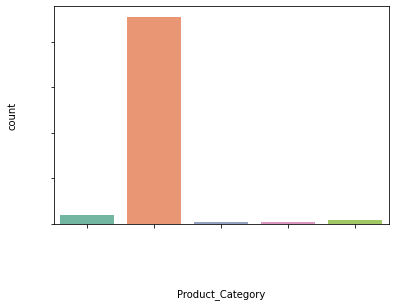

In [13]:
sns.countplot(x = 'Product_Category' ,data = data,palette='Set2')
plt.xticks(rotation = 45 , color= 'White');
plt.yticks(color= 'White');

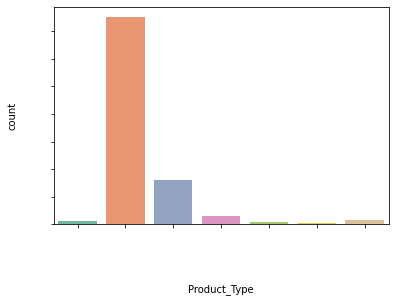

In [14]:
sns.countplot(x = 'Product_Type' ,data = data, palette='Set2', color='White')
plt.xticks(rotation = 45 , color= 'White');
plt.yticks(color= 'White');

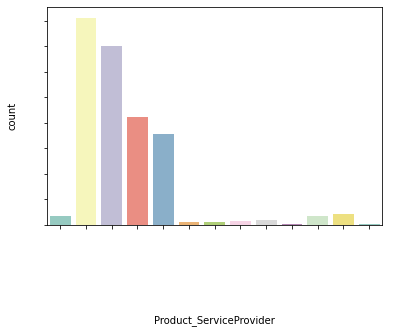

In [15]:
sns.countplot(x = 'Product_ServiceProvider' ,data = data, palette='Set3', color='White')
plt.xticks(rotation = 45 , color= 'White');
plt.yticks(color= 'White');

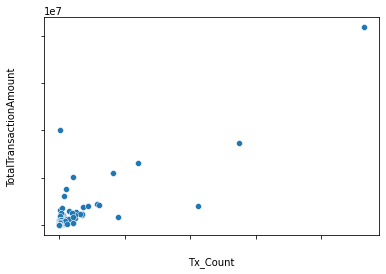

In [16]:
sns.scatterplot(x = 'Tx_Count' , y = 'TotalTransactionAmount' , data = data )
plt.xticks(color = 'White');
plt.yticks(color = 'White');

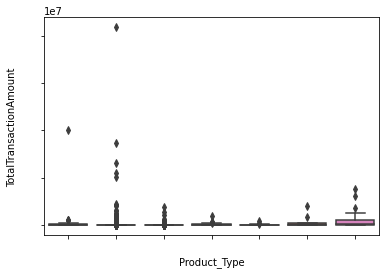

In [17]:
sns.boxplot(y = 'TotalTransactionAmount', x = 'Product_Type', data = data)
plt.xticks(color = 'white');
plt.yticks(color= 'white');

In [18]:
data =data.drop(['user_id','reseller_id' ,'superdealer_id'] , axis = 1)

In [19]:
data.isnull().sum()

Channel                    0
TotalTransactionAmount     0
Tx_Count                   0
DaysSinceLastTrans         0
Product_ServiceProvider    0
Product_Type               0
Product_Category           0
dtype: int64

In [20]:
for column in data:
    unique_value = np.unique(data[column])
    no_of_unique_value = len(unique_value)
    if no_of_unique_value < 17 :
        print('The number of values for feature {} : {} --{}'.format(column , no_of_unique_value , unique_value))
   
    else:
        print('The number of values for feature {} : {}'.format(column , no_of_unique_value))
              

The number of values for feature Channel : 7 --[ 1.  2.  4.  5.  6.  8. 10.]
The number of values for feature TotalTransactionAmount : 609
The number of values for feature Tx_Count : 180
The number of values for feature DaysSinceLastTrans : 276
The number of values for feature Product_ServiceProvider : 13 --['9mobile' 'Airtel' 'DSTV' 'Eko Electric' 'GOTV' 'Glo' 'Ibadan Electric'
 'Ikeja Electric' 'Jamb' 'Jos Electric' 'MTN' 'Portharcourt Electric'
 'Startimes']
The number of values for feature Product_Type : 7 --['Airtime' 'Data' 'E-facility' 'Pay TV' 'Postpaid' 'Prepaid' 'Voucher Pin']
The number of values for feature Product_Category : 5 --['Cable TV' 'Education' 'Electricity' 'Telco' 'Universal Pin']


In [21]:
data.columns

Index(['Channel', 'TotalTransactionAmount', 'Tx_Count', 'DaysSinceLastTrans',
       'Product_ServiceProvider', 'Product_Type', 'Product_Category'],
      dtype='object')

In [22]:
new_data = pd.get_dummies(data)

In [23]:
new_data.shape

(2454, 29)

In [24]:
new_data

,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,Product_ServiceProvider_9mobile,Product_ServiceProvider_Airtel,Product_ServiceProvider_DSTV,Product_ServiceProvider_Eko Electric,Product_ServiceProvider_GOTV,Product_ServiceProvider_Glo,...,Product_Type_E-facility,Product_Type_Pay TV,Product_Type_Postpaid,Product_Type_Prepaid,Product_Type_Voucher Pin,Product_Category_Cable TV,Product_Category_Education,Product_Category_Electricity,Product_Category_Telco,Product_Category_Universal Pin
0,8.0,532700,137,30,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1.0,1635552,131,30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8.0,548300,114,30,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,2.0,12200,13,30,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,8.0,211700,75,30,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630,1.0,1400,4,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2631,8.0,1600,8,325,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2632,8.0,200,1,329,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2633,8.0,9000,9,329,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [25]:
X_train = new_data.values

In [26]:
X_train

array([[8.000000e+00, 5.327000e+05, 1.370000e+02, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 1.635552e+06, 1.310000e+02, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [8.000000e+00, 5.483000e+05, 1.140000e+02, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [8.000000e+00, 2.000000e+02, 1.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [8.000000e+00, 9.000000e+03, 9.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 1.000000e+02, 1.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00]])

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)

In [30]:
from sklearn.cluster import KMeans

In [31]:
model = KMeans(n_clusters=5 , random_state = 540)

In [32]:
model.fit(X_train_scaled)

KMeans(n_clusters=5, random_state=540)

In [33]:
print('The clusters are', model.labels_)

The clusters are [2 0 2 ... 2 2 0]


In [34]:
print('The Inertia is', model.inertia_)

The Inertia is 40602.18350491246


In [35]:
model.labels_.shape

(2454,)

In [36]:
model.labels_[1:100]

array([0, 2, 0, 2, 0, 2, 4, 0, 4, 0, 0, 2, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       2, 0, 2, 4, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 4, 0, 0, 0, 4, 0, 4, 2, 0, 2, 0, 0,
       4, 0, 4, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 4, 4, 0])

In [37]:
no_of_clusters = range(2,30)
inertia = []

for f in no_of_clusters:
    model = KMeans(n_clusters = f , random_state=2)
    model.fit(X_train_scaled)
    u = model.inertia_
    inertia.append(u)
    print('The inertia for:' ,f, 'Cluster is:', u)

The inertia for: 2 Cluster is: 62083.57594481796
The inertia for: 3 Cluster is: 51637.9641044581
The inertia for: 4 Cluster is: 46358.43703968216
The inertia for: 5 Cluster is: 40258.67322896956
The inertia for: 6 Cluster is: 34993.04517546494
The inertia for: 7 Cluster is: 31431.23548192627
The inertia for: 8 Cluster is: 29184.812250601663
The inertia for: 9 Cluster is: 26060.559559494166
The inertia for: 10 Cluster is: 22970.64937593235
The inertia for: 11 Cluster is: 20777.48759985136
The inertia for: 12 Cluster is: 17937.30850619526
The inertia for: 13 Cluster is: 15224.415222321873
The inertia for: 14 Cluster is: 12722.654772579328
The inertia for: 15 Cluster is: 10245.454198439957
The inertia for: 16 Cluster is: 7787.487408453322
The inertia for: 17 Cluster is: 6794.946272752219
The inertia for: 18 Cluster is: 6141.474360992269
The inertia for: 19 Cluster is: 5654.187023017577
The inertia for: 20 Cluster is: 5184.358953921046
The inertia for: 21 Cluster is: 4590.084907288891
The 

Text(0.5, 1.0, 'Inertia plot for different k value')

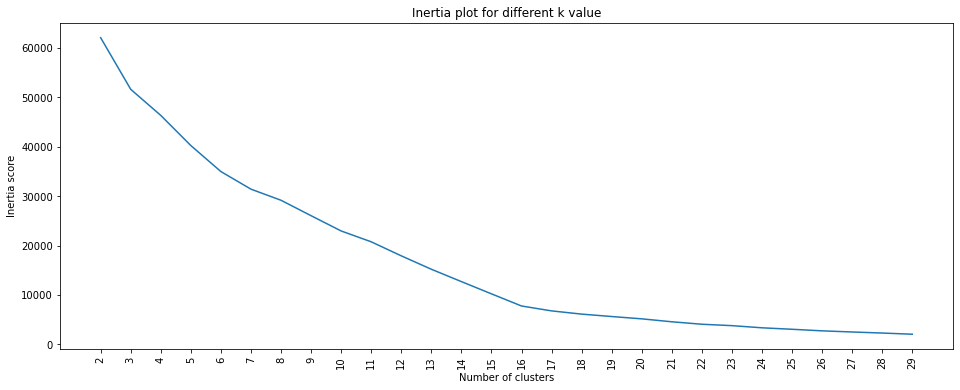

In [38]:
fig , (ax1) = plt.subplots(1 , figsize = (16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx , inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters , rotation ='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia score')
plt.title('Inertia plot for different k value')


In [39]:
model = KMeans(n_clusters=4 , random_state = 2)

In [40]:
model.fit(X_train_scaled)

KMeans(n_clusters=4, random_state=2)

In [41]:
model.inertia_

46358.43703968216

In [42]:
model.labels_[1:100]

array([0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
predictions = model.predict(X_train_scaled)

In [44]:
predictions

array([2, 0, 2, ..., 2, 2, 0])

In [45]:
unique , counts = np.unique(predictions , return_counts=True)

In [46]:
unique

array([0, 1, 2, 3])

In [47]:
counts = counts.reshape(1,4)

In [48]:
counts

array([[2299,   42,   99,   14]], dtype=int64)

In [49]:
df = pd.DataFrame(counts , columns=['cluster1', 'cluster2' , 'cluster3', 'cluster4'])

In [50]:
df

,cluster1,cluster2,cluster3,cluster4
0,2299,42,99,14


In [51]:
df['cluster1']

0    2299
Name: cluster1, dtype: int64

In [52]:
new_data.shape

(2454, 29)

In [53]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [54]:
X = X_train_scaled
y_num = predictions
target_names = ['cluster1', 'cluster2' , 'cluster3', 'cluster 4']

In [55]:
pca = PCA(n_components=2 , random_state=45)
X_pca = pca.fit_transform(X)

In [56]:
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

Explained variance ratio (first two components): [0.1811456  0.10614689]


In [57]:
X_pca_df = pd.DataFrame(X_pca, columns=['component1', 'component2'])

In [58]:
X_pca_df.shape

(2454, 2)

In [59]:
X_pca_df

,component1,component2
0,7.939953,-4.831092
1,-0.792185,0.146539
2,7.941035,-4.830123
3,-0.045356,-0.044029
4,7.913192,-4.946997
...,...,...
2449,-0.930394,-0.008431
2450,8.474675,-4.710429
2451,8.479885,-4.623920
2452,8.505992,-4.710408


In [60]:
y_num_df = pd.DataFrame(y_num , columns = ['cluster'])

In [61]:
y_num_df

,cluster
0,2
1,0
2,2
3,0
4,2
...,...
2449,0
2450,2
2451,2
2452,2


In [62]:
new_data = pd.concat([X_pca_df, y_num_df], axis = 1)

In [63]:
new_data

,component1,component2,cluster
0,7.939953,-4.831092,2
1,-0.792185,0.146539,0
2,7.941035,-4.830123,2
3,-0.045356,-0.044029,0
4,7.913192,-4.946997,2
...,...,...,...
2449,-0.930394,-0.008431,0
2450,8.474675,-4.710429,2
2451,8.479885,-4.623920,2
2452,8.505992,-4.710408,2


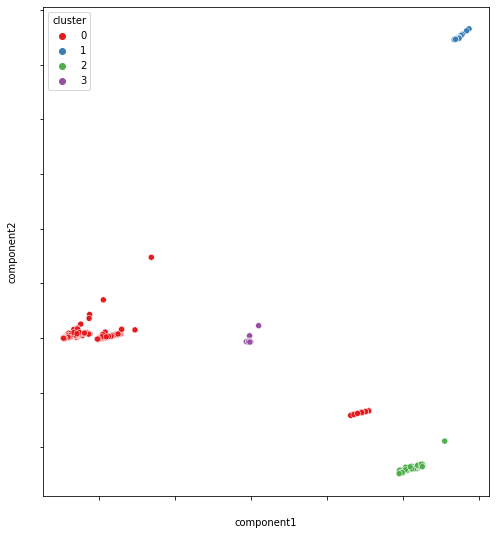

In [64]:
plt.figure(figsize=(8,9));
plt.xticks(color='white');
plt.yticks(color='white');
sns.scatterplot(x = 'component1', y = 'component2', data = new_data , hue = 'cluster',palette='Set1')
plt.savefig('cluster.jpg')

In [65]:
data

,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,Product_ServiceProvider,Product_Type,Product_Category
0,8.0,532700,137,30,Jos Electric,Postpaid,Electricity
1,1.0,1635552,131,30,MTN,Airtime,Telco
2,8.0,548300,114,30,Jos Electric,Postpaid,Electricity
3,2.0,12200,13,30,Airtel,Data,Telco
4,8.0,211700,75,30,Jos Electric,Prepaid,Electricity
...,...,...,...,...,...,...,...
2630,1.0,1400,4,32,MTN,Airtime,Telco
2631,8.0,1600,8,325,Ikeja Electric,Prepaid,Electricity
2632,8.0,200,1,329,Ikeja Electric,Postpaid,Electricity
2633,8.0,9000,9,329,Eko Electric,Prepaid,Electricity


In [66]:
segment = new_data['cluster']

In [67]:
segment

0       2
1       0
2       2
3       0
4       2
       ..
2449    0
2450    2
2451    2
2452    2
2453    0
Name: cluster, Length: 2454, dtype: int32

In [68]:
data = data.dropna(axis = 1 , how = 'any')

In [69]:
data.isnull().sum()

Channel                    0
TotalTransactionAmount     0
Tx_Count                   0
DaysSinceLastTrans         0
Product_ServiceProvider    0
Product_Type               0
Product_Category           0
dtype: int64

In [70]:
result = pd.concat([data , segment], axis =1).dropna()

In [71]:
result

,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,Product_ServiceProvider,Product_Type,Product_Category,cluster
0,8.0,532700.0,137.0,30.0,Jos Electric,Postpaid,Electricity,2.0
1,1.0,1635552.0,131.0,30.0,MTN,Airtime,Telco,0.0
2,8.0,548300.0,114.0,30.0,Jos Electric,Postpaid,Electricity,2.0
3,2.0,12200.0,13.0,30.0,Airtel,Data,Telco,0.0
4,8.0,211700.0,75.0,30.0,Jos Electric,Prepaid,Electricity,2.0
...,...,...,...,...,...,...,...,...
2447,1.0,50.0,1.0,56.0,MTN,Airtime,Telco,3.0
2448,1.0,50.0,1.0,56.0,Airtel,Airtime,Telco,2.0
2449,1.0,25.0,1.0,62.0,MTN,Airtime,Telco,0.0
2452,1.0,1400.0,8.0,38.0,MTN,Airtime,Telco,2.0


In [72]:
result[result['cluster'] ==0]

,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,Product_ServiceProvider,Product_Type,Product_Category,cluster
1,1.0,1635552.0,131.0,30.0,MTN,Airtime,Telco,0.0
3,2.0,12200.0,13.0,30.0,Airtel,Data,Telco,0.0
5,1.0,53400.0,106.0,30.0,MTN,Airtime,Telco,0.0
7,1.0,75100.0,319.0,30.0,Glo,Airtime,Telco,0.0
8,1.0,97350.0,265.0,30.0,MTN,Airtime,Telco,0.0
...,...,...,...,...,...,...,...,...
2437,1.0,300.0,2.0,30.0,Glo,Airtime,Telco,0.0
2438,1.0,1000.0,2.0,30.0,Airtel,Airtime,Telco,0.0
2442,1.0,6200.0,30.0,46.0,Glo,Airtime,Telco,0.0
2449,1.0,25.0,1.0,62.0,MTN,Airtime,Telco,0.0


In [73]:
result[result['cluster'] ==1]

,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,Product_ServiceProvider,Product_Type,Product_Category,cluster
1607,1.0,2500.0,3.0,145.0,9mobile,Airtime,Telco,1.0
1706,1.0,400.0,2.0,167.0,Airtel,Airtime,Telco,1.0
1742,8.0,9988000.0,87.0,174.0,Eko Electric,Postpaid,Electricity,1.0
1769,1.0,6600.0,13.0,180.0,Airtel,Airtime,Telco,1.0
1772,1.0,1200.0,3.0,181.0,MTN,Airtime,Telco,1.0
1773,1.0,700.0,5.0,181.0,Airtel,Airtime,Telco,1.0
1775,1.0,500.0,1.0,181.0,9mobile,Airtime,Telco,1.0
1776,1.0,11600.0,29.0,181.0,MTN,Airtime,Telco,1.0
1778,1.0,100.0,1.0,183.0,Airtel,Airtime,Telco,1.0
1779,8.0,2900.0,2.0,183.0,Ikeja Electric,Prepaid,Electricity,1.0


In [74]:
result[result['cluster'] ==2]

,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,Product_ServiceProvider,Product_Type,Product_Category,cluster
0,8.0,532700.0,137.0,30.0,Jos Electric,Postpaid,Electricity,2.0
2,8.0,548300.0,114.0,30.0,Jos Electric,Postpaid,Electricity,2.0
4,8.0,211700.0,75.0,30.0,Jos Electric,Prepaid,Electricity,2.0
6,8.0,276700.0,134.0,30.0,Jos Electric,Prepaid,Electricity,2.0
12,8.0,200150.0,108.0,30.0,Jos Electric,Prepaid,Electricity,2.0
...,...,...,...,...,...,...,...,...
2417,2.0,106600.0,49.0,33.0,9mobile,Data,Telco,2.0
2418,2.0,199900.0,138.0,34.0,Airtel,Data,Telco,2.0
2430,1.0,9200.0,11.0,124.0,9mobile,Airtime,Telco,2.0
2448,1.0,50.0,1.0,56.0,Airtel,Airtime,Telco,2.0


In [75]:
result[result['cluster'] ==3]

,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,Product_ServiceProvider,Product_Type,Product_Category,cluster
877,1.0,500.0,1.0,99.0,9mobile,Airtime,Telco,3.0
944,1.0,6350.0,29.0,103.0,Airtel,Airtime,Telco,3.0
976,1.0,500.0,1.0,105.0,Airtel,Airtime,Telco,3.0
1135,1.0,5000.0,1.0,112.0,Airtel,Airtime,Telco,3.0
1136,1.0,50.0,1.0,112.0,MTN,Airtime,Telco,3.0
2343,1.0,1550.0,2.0,39.0,Glo,Airtime,Telco,3.0
2439,1.0,500.0,1.0,30.0,MTN,Airtime,Telco,3.0
2440,1.0,22400.0,98.0,45.0,MTN,Airtime,Telco,3.0
2441,1.0,17200.0,58.0,46.0,Airtel,Airtime,Telco,3.0
2443,1.0,1700.0,11.0,48.0,9mobile,Airtime,Telco,3.0


In [76]:
result[result['cluster'] ==4]

,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,Product_ServiceProvider,Product_Type,Product_Category,cluster


In [77]:
result.corr()

,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,cluster
Channel,1.000000,0.224874,0.121548,0.238838,0.108725
TotalTransactionAmount,0.224874,1.000000,0.544101,0.011234,0.050948
Tx_Count,0.121548,0.544101,1.000000,-0.102724,0.061949
DaysSinceLastTrans,0.238838,0.011234,-0.102724,1.000000,0.035394
cluster,0.108725,0.050948,0.061949,0.035394,1.000000
